In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy.signal import find_peaks
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.ndimage import convolve1d

In [ ]:
# Parámetros iniciales
E_gamma = 662  # Energía del fotón gamma en keV (para Cs-137)
m_e_c2 = 511  # Energía en reposo del electrón en keV

# Función para dispersión Compton
def energia_compton(E_gamma, theta):
    return E_gamma * (1 - 1 / (1 + (E_gamma / m_e_c2) * (1 - np.cos(theta))))

# Función para generar ángulos uniformes entre 0 y pi
def angulos_uniformes(n_fotones):
    return np.random.uniform(-np.pi / 2, np.pi / 2, size=n_fotones)

# Número de fotones simulados
n_fotones = 10000000
energias = []

# Simulación Monte Carlo
theta_uniformes = angulos_uniformes(n_fotones)
for i in range(n_fotones):
    tipo_interaccion = np.random.choice(['compton', 'fotoelectrico'], p=[0.5, 0.5])  # Probabilidades de interacción
    if tipo_interaccion == 'compton':
        theta = theta_uniformes[i]  # Ángulo según la distribución uniforme
        E_disp = energia_compton(E_gamma, theta)
        energias.append(E_disp)
    else:
        energias.append(E_gamma)  # Fotoeléctrico, toda la energía es absorbida

# Histograma del espectro
bins = 300
hist, bin_edges = np.histogram(energias, bins=bins, density=True)



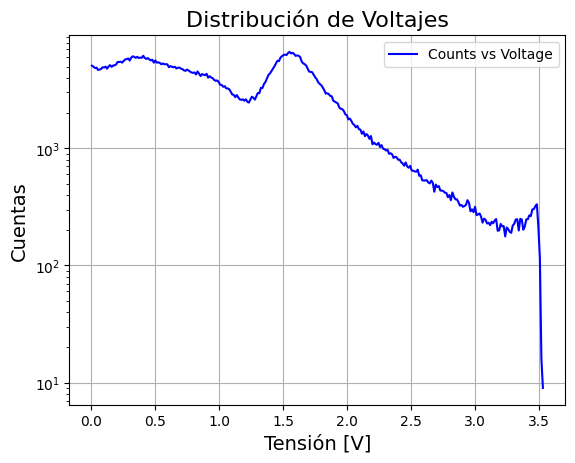

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the text file
with open('/content/cs_11_res_1500_resultados.txt', 'r') as f:
    next(f)  # Skip header
    lines = f.readlines()

# Organize data into columns
columns = [[] for _ in range(len(lines[0].split(',')))]
for line in lines:
    values = line.strip().split(',')
    for i, value in enumerate(values):
        columns[i].append(float(value))

# Convert lists to NumPy arrays
columns = [np.array(col) for col in columns]
tiempo = columns[0]
voltaje = columns[1]

# Create histogram data
counts, bin_edges = np.histogram(voltaje, bins=300)

# Calculate the center of each bin
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Plot the data
plt.plot(bin_centers, counts, label='Counts vs Voltage', color='b')
plt.xlabel('Tensión [V]', fontsize=14)
plt.ylabel('Cuentas', fontsize=14)
plt.yscale("log")  # Use logarithmic scale for y-axis
plt.title('Distribución de Voltajes', fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Parámetros de la gaussiana:
 Amplitud: 900.3945823840328
 Media: 1.5591582852601624
 Desviación estándar: 0.19605534955312146


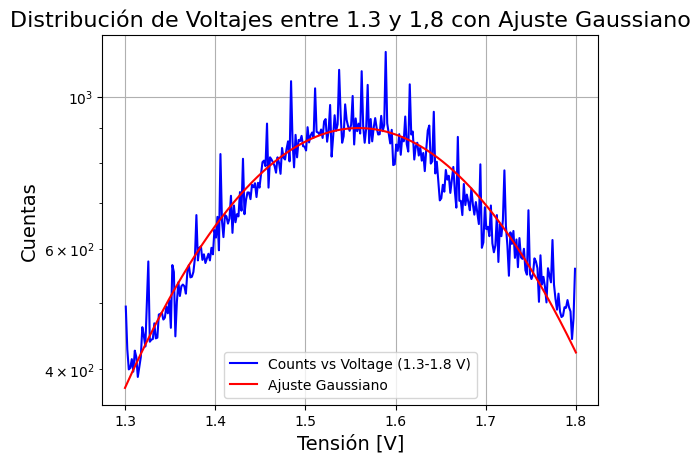

In [ ]:
# Load data from the text file
with open('/content/cs_11_res_1500_resultados.txt', 'r') as f:
    next(f)  # Skip header
    lines = f.readlines()

# Organize data into columns
columns = [[] for _ in range(len(lines[0].split(',')))]
for line in lines:
    values = line.strip().split(',')
    for i, value in enumerate(values):
        columns[i].append(float(value))

# Convert lists to NumPy arrays
columns = [np.array(col) for col in columns]
tiempo = columns[0]
voltaje = columns[1]

# Filter voltages between 4 and 4.5
mask = (voltaje >= 1.3) & (voltaje <= 1.8)
filtered_voltaje = voltaje[mask]

# Create histogram data for filtered voltages
counts, bin_edges = np.histogram(filtered_voltaje, bins=300)

# Calculate the center of each bin
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Filter bins and counts based on the voltage range
filtered_bins = bin_centers[(bin_centers >= 1.3) & (bin_centers <= 1.8)]
filtered_counts = counts[(bin_centers >= 1.3) & (bin_centers <= 1.8)]

# Define Gaussian function
def gaussian(x, amp, mean, stddev):
    return amp * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Fit Gaussian to the filtered data
p0 = [np.max(filtered_counts), np.mean(filtered_bins), np.std(filtered_bins)]  # Initial guess for parameters
params, covariance = curve_fit(gaussian, filtered_bins, filtered_counts, p0)

# Extract parameters
amplitude, mean, stddev = params
print(f'Parámetros de la gaussiana:\n Amplitud: {amplitude}\n Media: {mean}\n Desviación estándar: {stddev}')

# Plot the histogram and the Gaussian fit
plt.plot(filtered_bins, filtered_counts, label='Counts vs Voltage (1.3-1.8 V)', color='b')
x_fit = np.linspace(1.3, 1.8, 1000)
y_fit = gaussian(x_fit, *params)
plt.plot(x_fit, y_fit, label='Ajuste Gaussiano', color='r')
plt.xlabel('Tensión [V]', fontsize=14)
plt.ylabel('Cuentas', fontsize=14)
plt.yscale("log")  # Use logarithmic scale for y-axis
plt.title('Distribución de Voltajes entre 1.3 y 1,8 con Ajuste Gaussiano', fontsize=16)
plt.legend()
plt.grid()
plt.show()

Aca hice un pasaje de volts a keV sabiendo que el pico del cesio era de 662 keV y caía en 1.55 V

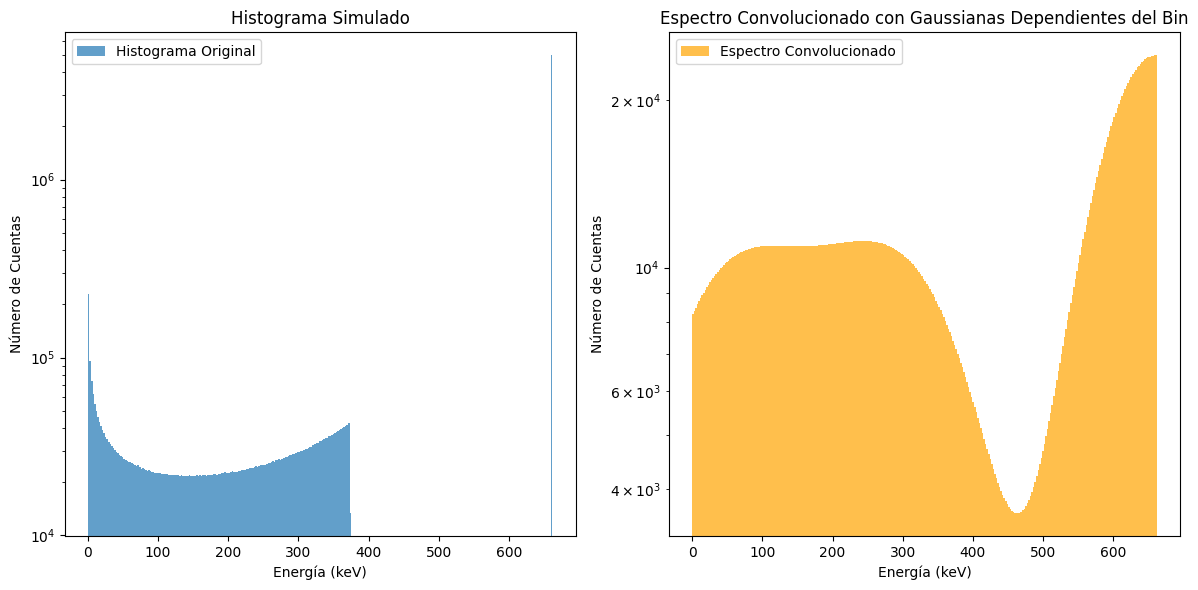

In [ ]:
# Histograma del espectro (sin normalizar)
hist, bin_edges = np.histogram(energias, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Crear un array vacío para almacenar el resultado de la convolución
convolucionado = np.zeros_like(hist, dtype=float)

# Realizar la convolución bin por bin sin normalización
for i, center in enumerate(bin_centers):
    # Crear una gaussiana centrada en el valor del bin actual, sin normalizarla
    gauss = gaussian(bin_centers, hist[i], center, desviacion_estandar)

    # Agregar el resultado de la gaussiana al array convolucionado
    convolucionado += gauss

# Visualizar el histograma original y el espectro convolucionado
plt.figure(figsize=(12, 6))

# Histograma original
plt.subplot(1, 2, 1)
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.7, label='Histograma Original')
plt.yscale('log')
plt.xlabel('Energía (keV)')
plt.ylabel('Número de Cuentas')
plt.title('Histograma Simulado')
plt.legend()

# Histograma convolucionado
plt.subplot(1, 2, 2)
plt.bar(bin_centers, convolucionado, width=(bin_edges[1] - bin_edges[0]), color='orange', alpha=0.7, label='Espectro Convolucionado')
plt.yscale('log')
plt.xlabel('Energía (keV)')
plt.ylabel('Número de Cuentas')
plt.title('Espectro Convolucionado con Gaussianas Dependientes del Bin')
plt.legend()

plt.tight_layout()
plt.show()


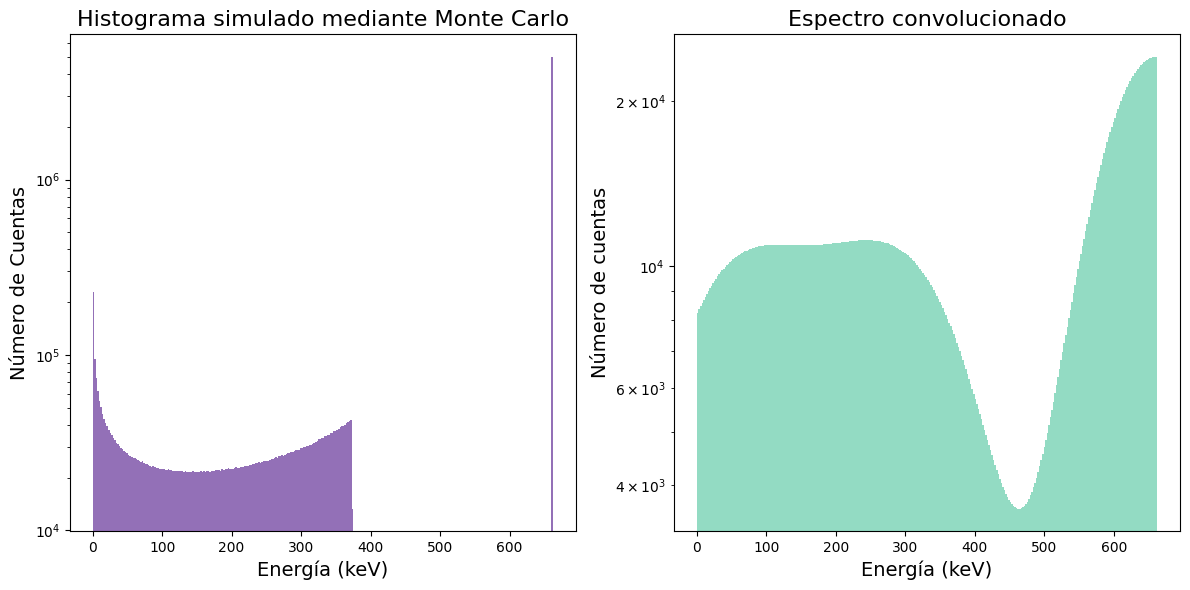

In [ ]:
# Visualizar el histograma original y el espectro convolucionado
plt.figure(figsize=(12, 6))

# Histograma original
plt.subplot(1, 2, 1)
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), color='rebeccapurple', alpha=0.7, label='Histograma Original')
plt.yscale('log')
plt.xlabel('Energía (keV)', fontsize=14)
plt.ylabel('Número de Cuentas', fontsize=14)
plt.title('Histograma simulado mediante Monte Carlo', fontsize=16)
#plt.legend()

# Histograma convolucionado
plt.subplot(1, 2, 2)
plt.bar(bin_centers, convolucionado, width=(bin_edges[1] - bin_edges[0]), color='mediumaquamarine', alpha=0.7, label='Espectro Convolucionado')
plt.yscale('log')
plt.xlabel('Energía (keV)', fontsize=14)
plt.ylabel('Número de cuentas', fontsize=14)
plt.title('Espectro convolucionado', fontsize=16)
#plt.legend()

plt.tight_layout()
plt.show()
